Notebook used for the Esri API-integration workshop, wherein the ArcGIS API for Python is introduced to the user.

More information here:
https://www.eventbrite.com/e/esri-nyc-open-hours-build-a-live-updating-dashboard-with-nyc-open-data-tickets-61502837643

In [2]:
from arcgis import GIS

In [3]:
gis= GIS()

In [4]:
gis = GIS("https://www.arcgis.com", "sylvanos")

Enter password: ········


In [ ]:
m1 = gis.map("New York, NY", zoomlevel=12)


<Item title:"Borough Boundaries" type:Feature Layer Collection owner:sylvanos>
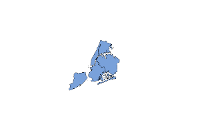

In [5]:
from IPython.display import display

items = gis.content.search("Borough", item_type="feature layer")
for item in items:
    display(item)
    item

In [ ]:
m1.add_layer(items[0])


In [ ]:
m1

In [ ]:
m2 = gis.map("New York, NY")
m2.basemap = 'dark-gray-vector'

In [ ]:
item = gis.content.get("5ed2d52b1fb04424b69932e43a61da89")
flayer = item.layers[0]
m2.add_layer(flayer)

information has been added to the borough map using ArcGis "enrich"

In [ ]:
m2

In [6]:
import pandas as pd

In [7]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [ ]:
sdf = pd.DataFrame.spatial.from_layer(flayer)
sdf.head()

In [ ]:
sdf.spatial.plot(map_widget = m2,
                renderer_type='c',  # for class breaks renderer
                method='esriClassifyNaturalBreaks',  # classification algorithm
                class_count=5,  # choose the number of classes
                col='SENIORS_CY',  # column to get unique values from
                cmap='prism',  # color map to pick colors from for each class
               )

In [ ]:
m2

In [8]:
from arcgis import features

below json endpoint query can probably be scripted by using the SODA api

In [ ]:
df = pd.read_json("https://data.cityofnewyork.us/resource/b2iz-pps8.json?$limit=500000&$where=inspectiondate%20between%20%272019-01-01T00:00:00%27%20and%20%272019-06-02T23:59:59%27")

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
pd.options.display.max_columns = 500

In [ ]:
csv_output = '~/Documents/hpd_test_csv.csv'

In [ ]:
df.to_csv(csv_output, sep=',', index=False)

In [21]:
dfcsv = pd.read_csv("~/Documents/hpd_test_csv.csv")

In [28]:
title = 'HPD_test_2'
item_prop = {'title': title}
csv_item = gis.content.add(item_properties=item_prop, data="/Users/sylvan/Documents/hpd_test_csv.csv")
csv_item

<Item title:"HPD_test_2" type:CSV owner:sylvanos>

In [30]:
# Obtain the CSV item ID and publish the CSV item as a hosted feature layer
csv_item_id = csv_item.id
print("The CSV item ID is: " + str(csv_item_id))

# Publishing the CSV as a hosted feature layer (using Web Mercator projected coordinate system)
# feature_layer_item = gis.content.get("69cc157c2fec4739ac42b98f40d8bba7")
# feature_layer_item.publish()

feature_layer_item = gis.content.get(csv_item_id)
feature_layer_item.publish()

''' 
# Set up publishing parameters (pparms) for publishing.
pparms = {"name": 'HPD_test', 
          "targetSR": {"latestWkid": 2263, "wkid":102718},
          "extent":{"xmin":923594,"ymin":134684,"xmax":1066253,"ymax":270842,
                    "spatialReference":{"wkid":102718,"latestWkid":2263}}}

feature_layer_item.publish()
'''

The CSV item ID is: 9f373323839641c18969f285ea7fee41


' \n# Set up publishing parameters (pparms) for publishing.\npparms = {"name": \'HPD_test\', \n          "targetSR": {"latestWkid": 2263, "wkid":102718},\n          "extent":{"xmin":923594,"ymin":134684,"xmax":1066253,"ymax":270842,\n                    "spatialReference":{"wkid":102718,"latestWkid":2263}}}\n\nfeature_layer_item.publish()\n'

In [24]:
pparms = {"file_type":"csv","name": 'HPD_test', 
          "targetSR": {"latestWkid": 2263, "wkid":102718},
          "extent":{"xmin":923594,"ymin":134684,"xmax":1066253,"ymax":270842,
                    "spatialReference":{"wkid":102718,"latestWkid":2263}}}


In [31]:
search = gis.content.search(query="title: HPD_test", item_type="Feature Service")
search

[<Item title:"HPD_test_2" type:Feature Layer Collection owner:sylvanos>]